In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import ppscore as pps
import shap
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.0', '1.2.4', '0.12.2', '3.7.2')

In [3]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [4]:
dataset = pd.read_csv('../databases/Cars.csv')

In [5]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
dataset['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [7]:
dataset= dataset[dataset['fuel']!='LPG']

In [8]:
dataset= dataset[dataset['fuel']!='LPG']

In [9]:
dataset= dataset[dataset['fuel']!='CNG']

In [10]:
dataset['mileage']=dataset['mileage'].str.split(' ').str.get(0).str.replace(',', '')

In [11]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
dataset['year'].astype(int)

0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8123    2013
8124    2007
8125    2009
8126    2013
8127    2013
Name: year, Length: 8033, dtype: int64

In [13]:
dataset=dataset[~dataset['mileage'].isna()]

In [14]:
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7819 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7819 non-null   object 
 1   year           7819 non-null   int64  
 2   selling_price  7819 non-null   int64  
 3   km_driven      7819 non-null   int64  
 4   fuel           7819 non-null   object 
 5   seller_type    7819 non-null   object 
 6   transmission   7819 non-null   object 
 7   owner          7819 non-null   object 
 8   mileage        7819 non-null   object 
 9   engine         7819 non-null   object 
 10  max_power      7819 non-null   object 
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 855.2+ KB


In [16]:
dataset['engine']=dataset['engine'].str.split(' ').str.get(0).str.replace(',', '')

In [17]:
dataset['engine']=dataset['engine'].astype(float)

In [18]:
dataset['name']=dataset['name'].str.split(' ').str.slice(0,1)

In [19]:
dataset['max_power']= dataset['max_power'].str.split(' ').str.get(0).str.replace(',', '')

In [20]:
dataset.isnull().sum().any()

False

In [21]:
dataset = dataset.drop('torque', axis=1)

In [22]:
dataset.apply(pd.to_numeric, errors="ignore").applymap(lambda x: isinstance(x, float), na_action='ignore').any()
# dataset['max_power']=dataset['max_power'].astype(float)

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
seats             True
dtype: bool

In [23]:
dataset['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '37', '67.1', '68.1',
       '108.45', '60', '73.9', '67', '82', '88.5', '46.3', '88.73',
       '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8', '34.2',
       '35', '81.83', '121.3', '138.03', '160.77', '117.3', '116.3',
       '83.14', '67.05', '168.5', '100', '120.7', '98.63', '175.56',
       '103.25', '171.5', '100.6', '174.33', '187.74', '170', '78.9',
       '88.76', '86.8', '108.495', '108.62', '93.7', '103.6', '98.59',
       '189', '67.04', '68.05', '82.85', '81.80', '73', '120', '94.68',
       '160', '65', '155', '69.01', '126.32', '138.1', '83.8', '126.2',
       '98.96', '62.1', '86.7', '188', '214.56', '177', '280', '148.31',
       '254.79', '190', '177.46', '204', '141', '117.6', '241.4', '282',
       '150', '147.5', '108.5', '103.5', '183', '181.04', '157.7',
       '164.7', '91.1', '400', '68', '75', '85.8', '87.2', '53', '118',
       '103.2', '83', '84', '147.94', '74.02', '53.3', '80', '88.7',
       '9

In [24]:
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

In [25]:
dataset['max_power']=dataset['max_power'].astype(float)

In [26]:
dataset['mileage']=dataset['mileage'].astype(float)

In [27]:
dataset['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [28]:
dataset= dataset[dataset['owner']!="Test Drive Car"]

In [29]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7814 non-null   object 
 1   year           7814 non-null   int64  
 2   selling_price  7814 non-null   int64  
 3   km_driven      7814 non-null   int64  
 4   fuel           7814 non-null   object 
 5   seller_type    7814 non-null   object 
 6   transmission   7814 non-null   object 
 7   owner          7814 non-null   object 
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7814 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 793.6+ KB


In [30]:
dataset['selling_price']= np.log(dataset['selling_price'])

In [31]:

dataset.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,[Maruti],2014,13.017003,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,[Skoda],2014,12.821258,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,[Honda],2006,11.970350,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,[Hyundai],2010,12.323856,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,[Maruti],2007,11.775290,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


Univariate analysis




COUNTPLOT

<Axes: xlabel='fuel', ylabel='count'>

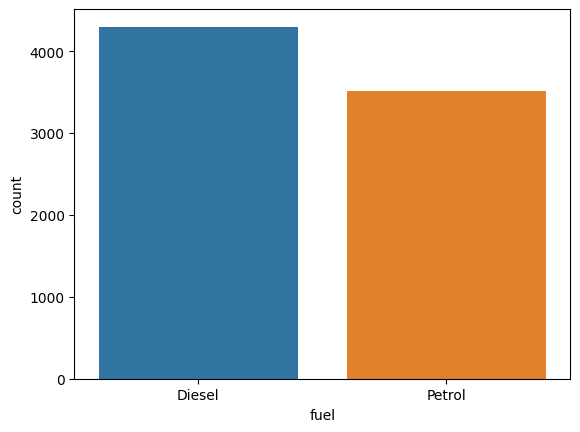

In [32]:
sns.countplot(data= dataset, x = 'fuel' )

**DISTRIBUTION PLOT**

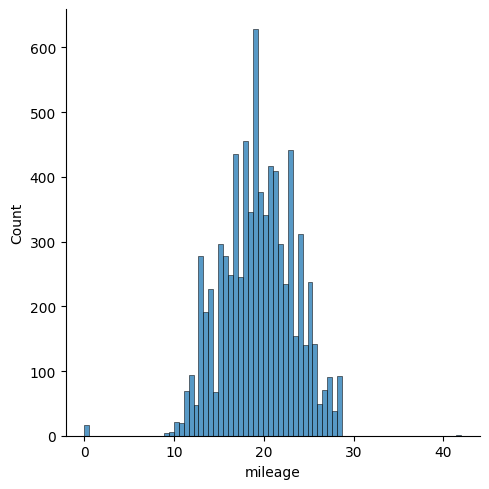

In [33]:
sns.displot(data = dataset, x = 'mileage')

**BOXPLOT**

Text(0.5, 0, 'Status')

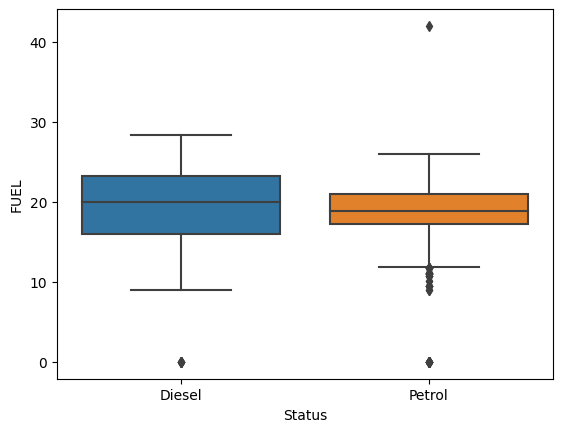

In [34]:
sns.boxplot(x = dataset["fuel"], y = dataset["mileage"]);
plt.ylabel("FUEL")
plt.xlabel("Status")

**CORRELATION MATRIX**

<Axes: >

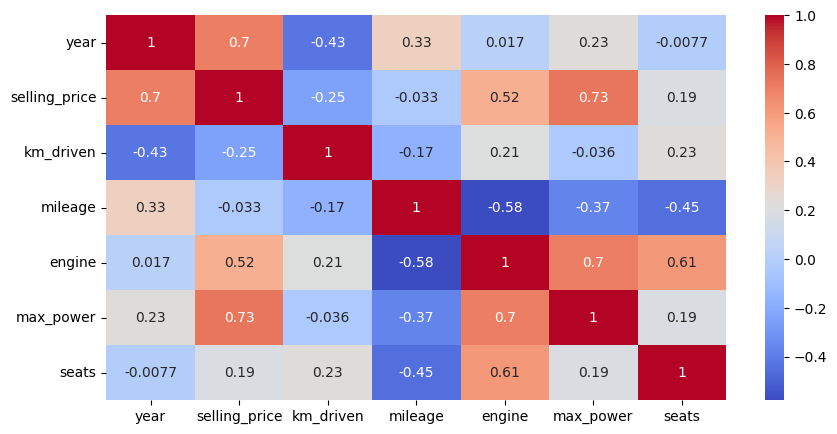

In [35]:
plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

**Predictive Power Score:**
This can also be done in order to check the predictive power of some features.


<Axes: xlabel='x', ylabel='y'>

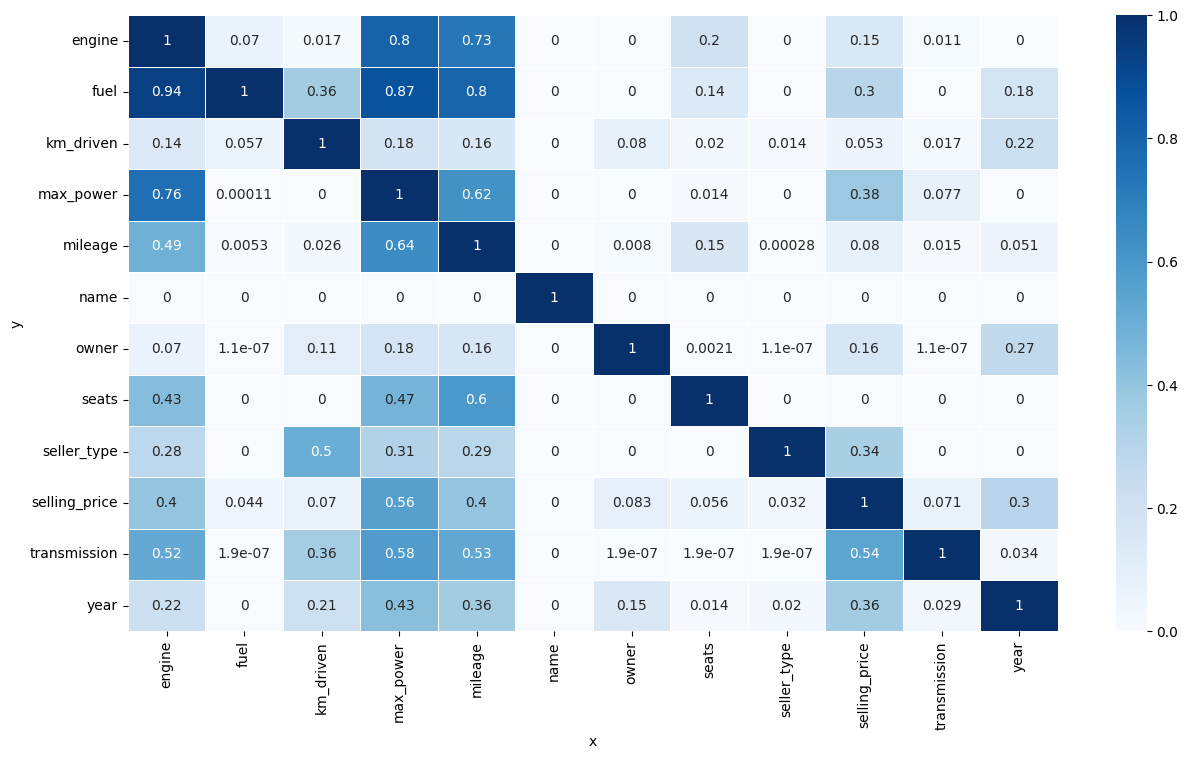

In [36]:
# before using pps, let's drop country and year
datasetcopy = dataset.copy()
# dataset.drop(['year'], axis='columns', inplace=True)
#we are changiing some preprocessing as seaboarn.heatmap does not allow tidy data
matrix_df = pps.matrix(datasetcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.6, annot=True)

**FEATURE SELECTION **

**FEATURE SELECTION**

In [96]:
#x is our strong features
X = dataset[        ['engine', 'max_power']      ]

#y is simply the life expectancy col
y = dataset["selling_price"]

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [98]:
#check for null values
X_train[['engine', 'max_power']].isna().sum()

engine       0
max_power    0
dtype: int64

In [99]:
X_test[['engine', 'max_power']].isna().sum()

engine       0
max_power    0
dtype: int64

In [41]:
y_train.isna().sum()

0

In [42]:
y_test.isna().sum()

0

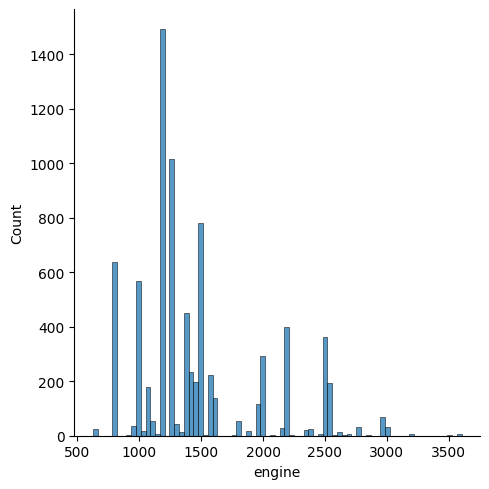

In [43]:
sns.displot(data = dataset, x = 'engine')

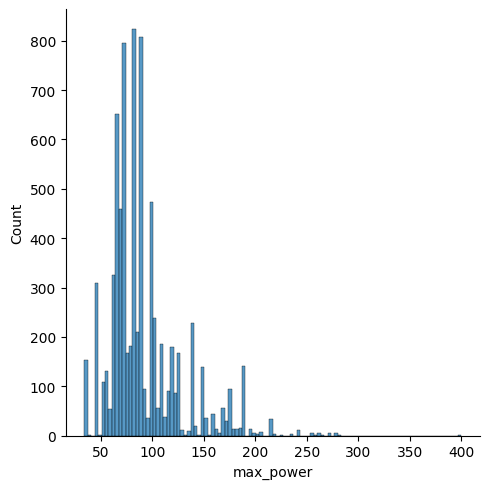

In [44]:
sns.displot(data=dataset, x='max_power')

In [100]:
# sns.displot(data = dataset, x = 'mileage')

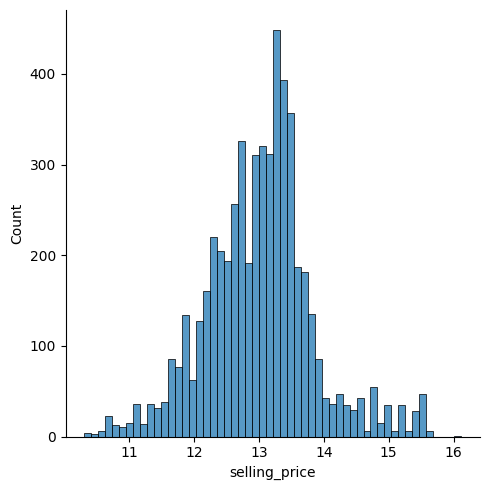

In [46]:
sns.displot(y_train)


In [101]:
#I/m just showing if in case there's a nan value inside this column, I have deleted all the columns with nan values so this is not required
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

# X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [48]:
#I/m just showing if in case there's a nan value inside this column, I have deleted all the columns with nan values so this is not required
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_train.median(), inplace=True)

In [102]:
##I/m just showing if in case there's a nan value inside this column, I have deleted all the columns with nan values so this is not required

X_train[['engine','max_power']].isna().sum()

engine       0
max_power    0
dtype: int64

In [50]:
##I/m just showing if in case there's a nan value inside this column, I have deleted all the columns with nan values so this is not required

X_test[['engine','max_power', 'mileage']].isna().sum()

engine       0
max_power    0
mileage      0
dtype: int64

In [103]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

**CHECKING IF THERE are any outliers**

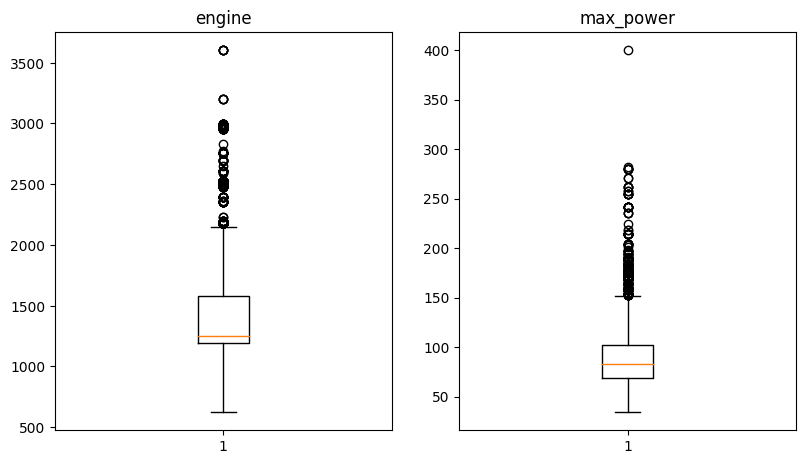

In [104]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [105]:
def outlier_count(col, data = X_train):

    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])

    # calculate your inter quatile
    iqr = q75 - q25

    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))


In [106]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 828
Percent of data that is outlier: 15.14%

---------------max_power---------------

Number of outliers: 410
Percent of data that is outlier: 7.5%


In [107]:
from scipy.stats import zscore


In [56]:
# numeric_columns = dataset.select_dtypes(include=[np.number])
# dataset = dataset[(np.abs(zscore(numeric_columns)) <= 3).all(axis=1)]

# **SCALING**

In [108]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [109]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5469, 2)
Shape of X_test:  (2345, 2)
Shape of y_train:  (5469,)
Shape of y_test:  (2345,)


# **MODELLING**

In [110]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.3128943768574234
r2:  0.5266628320024678


DOing some cross validation

In [111]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0),
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [112]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.29816852 -0.33127886 -0.33039865 -0.32535994 -0.32842729]; Mean: -0.32272665117711263
SVR - Score: [-0.23995329 -0.24886077 -0.27420211 -0.2980177  -0.27307882]; Mean: -0.26682253887909224
KNeighbors Regressor - Score: [-0.13556763 -0.12344614 -0.1246147  -0.11430545 -0.1188218 ]; Mean: -0.12335114012241007
Decision-Tree Regressor - Score: [-0.1080097  -0.11594359 -0.10248183 -0.11064186 -0.10018214]; Mean: -0.10745182204646238
Random-Forest Regressor - Score: [-0.10406484 -0.09624581 -0.09744036 -0.08887657 -0.1144764 ]; Mean: -0.10022079621143372


# GRID SEARCH

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [114]:
grid.best_params_


{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [115]:
best_mse = grid.best_score_

In [116]:
best_mse  # ignore the minus because it's neg_mean_squared_error

-0.10106492382493529

# TESTING

In [117]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.09470784304425219

# ANALYSIS

In [118]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.13934976, 0.86065024])

<BarContainer object of 2 artists>

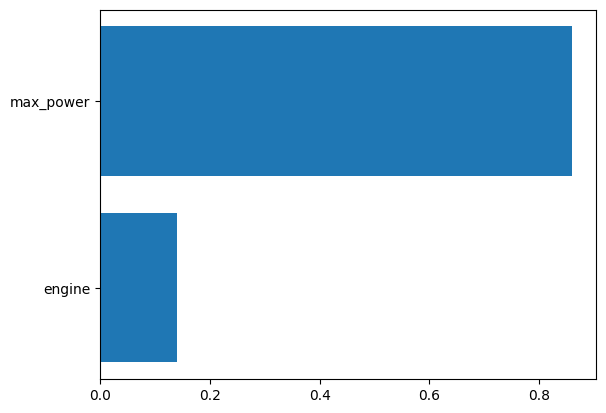

In [119]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

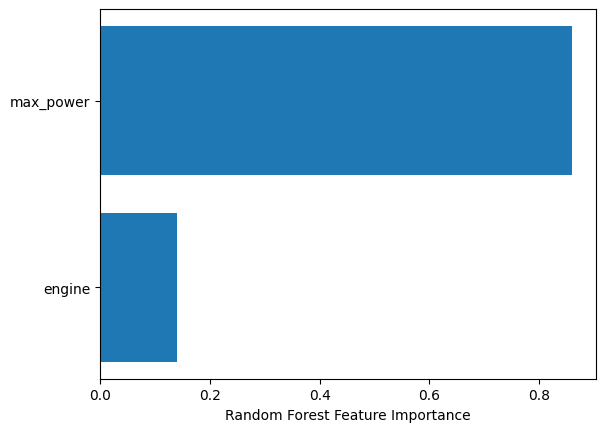

In [120]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


# SHAP WAY

In [121]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)


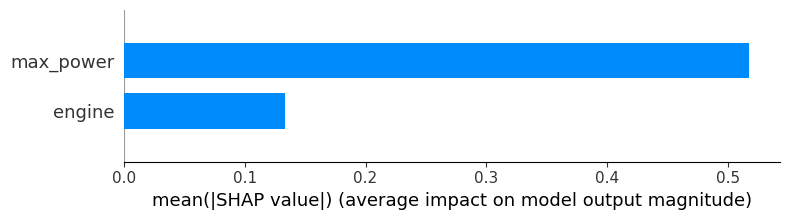

In [122]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## INFERENCE

In [123]:
# !pip install pickle-mixin

In [73]:
import pickle

In [74]:
# save the model to disk
filename = '../model/prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [75]:
selling_price_model = pickle.load(open("../model/prediction.model", "rb"))


In [94]:
# Creating a dummy sample
sample = {
    "engine": [100],
    "max_power": [15],
    # "mileage": [1]
}



In [95]:
# Convert the sample to panda dataframe
sample = pd.DataFrame(sample)

# Scale the sample using the same scaler used for X_train and X_set
scaled_sample = scaler.transform(sample)

# Use the model to predict the selling price
predicted_selling_price = selling_price_model.predict(scaled_sample)

# As the we have log transformed the y while training and set, we will need to exponent transform the predicted value for correct prediction
predicted_selling_price = np.exp(predicted_selling_price)

print("Predicted selling price of this model of car is  " + str(predicted_selling_price[0]))


Predicted selling price of this model of car is  120412.33384768835
